In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv('/Users/zzgr/Desktop/zzgrSandaeteuk/PROJECT GAS STATION/데이터/로우 데이터/산업통상자원부 전국 주유소 등록현황 20211231.CSV', encoding='cp949')

In [62]:
idx = df[df['구분']=='등록취소'].index
df.drop(index=idx, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,연도,변동사유발생연월일,판매업종류,구분,업체명,소재지
0,2015,2015-01-02,주유소,휴업,(주)유림에너지 대기주유소,대구광역시 북구 팔달로41 (노원동3가)
1,2015,2015-01-05,주유소,신규등록,광나는 주유소,경기도 동두천시 평화로3059
2,2015,2015-01-05,주유소,폐업,㈜소모석유 상무제일주유소,광주광역시 서구 상무시민로142 (치평동)
3,2015,2015-01-05,주유소,휴업,활주로주유소,전라남도 나주시 산남로141 (산포면)
4,2015,2015-01-06,주유소,신규등록,남상주농협주유소,경북 상주시 청리면 남상주로 1044
...,...,...,...,...,...,...
5912,2021,2021-12-30,주유소,휴업,계명주유소,대전광역시 유성구 현충원로492 (장대동)
5913,2021,2021-12-30,주유소,휴업,삼릉주유소,경기도 고양시 덕양구 원당로367 (원당동)
5914,2021,2021-12-31,주유소,폐업,연산주유소,부산광역시 연제구 월드컵대로60 (연산동)
5915,2021,2021-12-31,주유소,폐업,대아주유소,전라북도 완주군 대아저수로363 (고산면)


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [64]:
df_2019 = df[df['연도']==2019]
df_2020 = df[df['연도']==2020]
df_2021 = df[df['연도']==2021]

In [65]:
df_2019.reset_index(drop=True, inplace=True)

In [66]:
df_2020.reset_index(drop=True, inplace=True)

In [67]:
df_2021.reset_index(drop=True, inplace=True)

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [69]:
# df = pd.read_csv('test.csv')
# # df[df['구분'] == '휴업']['판매업종류'].expanding().sum()
# names = np.unique( df['구분'].values)
# for i in names:
#   temp = df[df['구분'] == i]['판매업종류'].expanding().sum()
#   df.iloc[temp.index,3] = temp 
# df['변동사유발생연월'] = df['변동사유발생연월일'].apply(lambda x : x[:7])
# df  

df = pd.DataFrame(df_2019.groupby(['변동사유발생연월일','구분'])['판매업종류'].count())
df = df.reset_index()
df['변동사유발생연월일'] = df['변동사유발생연월일'].apply(lambda x : x[:7])

names = np.unique( df['구분'].values)
for i in names:
  temp = df[df['구분'] == i]['판매업종류'].expanding().sum()
  df.iloc[temp.index,2] = temp 


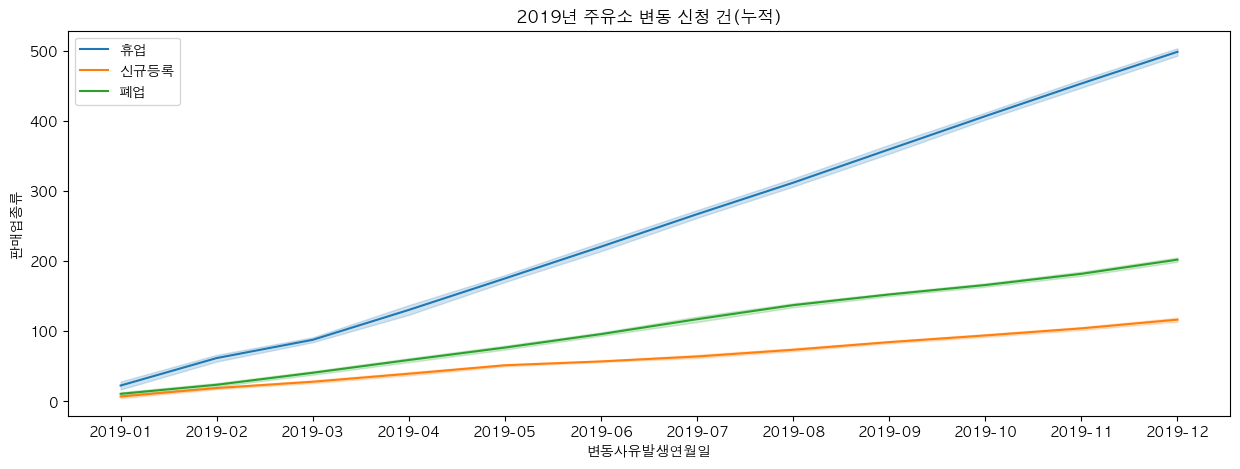

In [70]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x= '변동사유발생연월일', y='판매업종류', hue='구분')
plt.title('2019년 주유소 변동 신청 건(누적)')
plt.legend()
plt.show()

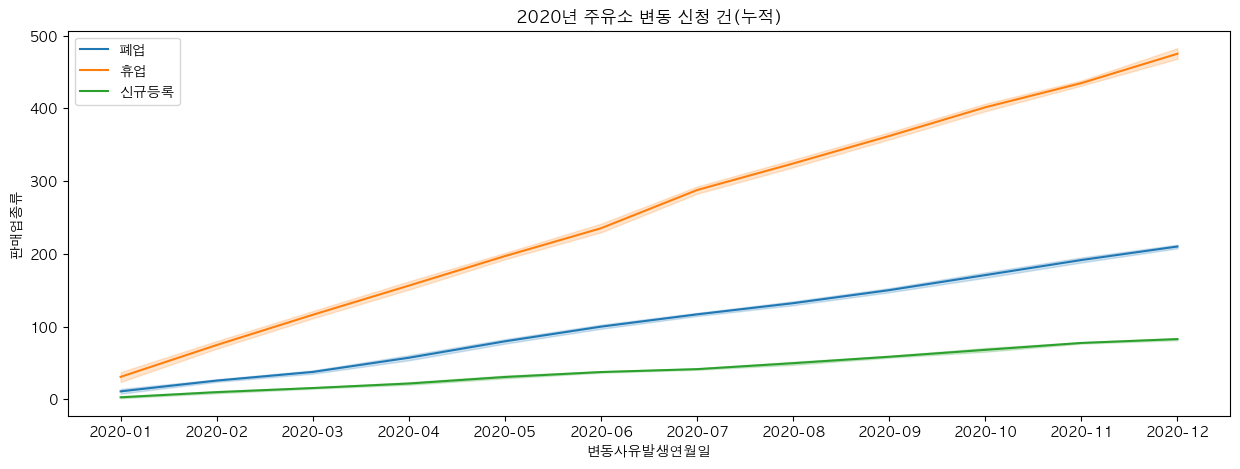

In [72]:
df2 = pd.DataFrame(df_2020.groupby(['변동사유발생연월일','구분'])['판매업종류'].count())
df2 = df2.reset_index()
df2['변동사유발생연월일'] = df2['변동사유발생연월일'].apply(lambda x : x[:7])

names = np.unique( df2['구분'].values)
for i in names:
  temp = df2[df2['구분'] == i]['판매업종류'].expanding().sum()
  df2.iloc[temp.index,2] = temp 


plt.figure(figsize=(15,5))

sns.lineplot(data=df2, x= '변동사유발생연월일', y='판매업종류', hue='구분', color=['r','b','g','y'])
plt.title('2020년 주유소 변동 신청 건(누적)')
plt.legend()
plt.show()

In [73]:
df2.columns = ['변동사유발생연월일','구분','횟수']
df2.to_csv('2020 주유소 폐업 현황.csv')

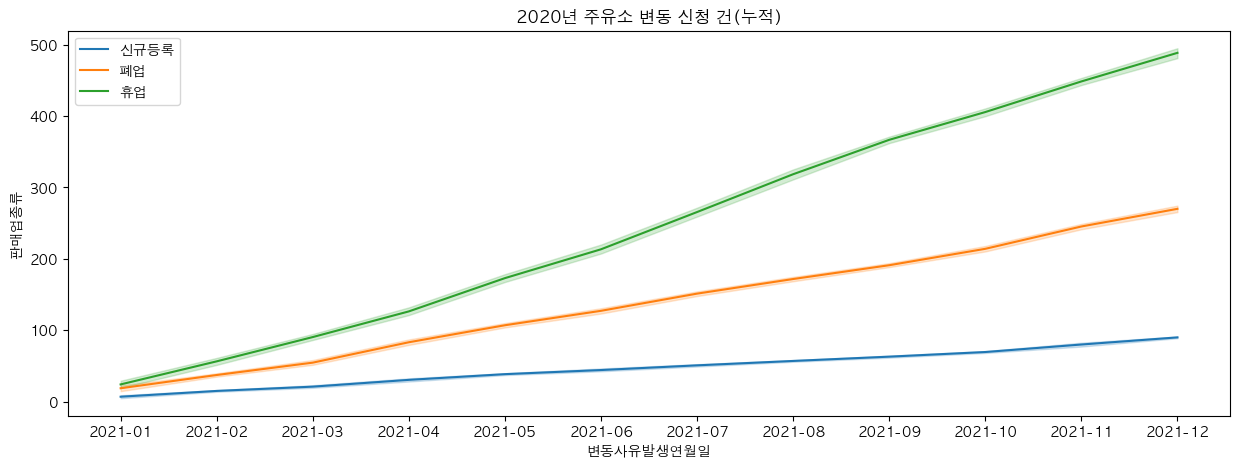

In [74]:
df3 = pd.DataFrame(df_2021.groupby(['변동사유발생연월일','구분'])['판매업종류'].count())
df3 = df3.reset_index()
df3['변동사유발생연월일'] = df3['변동사유발생연월일'].apply(lambda x : x[:7])

names = np.unique( df3['구분'].values)
for i in names:
  temp = df3[df3['구분'] == i]['판매업종류'].expanding().sum()
  df3.iloc[temp.index,2] = temp 


plt.figure(figsize=(15,5))
sns.lineplot(data=df3, x= '변동사유발생연월일', y='판매업종류', hue='구분')
plt.title('2020년 주유소 변동 신청 건(누적)')
plt.legend()
plt.show()

In [75]:
df3.columns = ['변동사유발생연월일','구분','횟수']
df3.to_csv('2021 주유소 폐업 현황.csv')